In [1]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
  
    
%matplotlib inline

In [2]:
df=pd.read_csv('Seed.csv')
df.head()

,Area,Perimeter,Compactness,Length Of Kernel,Width Of Kernel,Asymmetry Coefficient,Length Of Kernel Groove,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [3]:
df.describe()

,Area,Perimeter,Compactness,Length Of Kernel,Width Of Kernel,Asymmetry Coefficient,Length Of Kernel Groove,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,1.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,1.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,2.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter                210 non-null    float64
 2   Compactness              210 non-null    float64
 3   Length Of Kernel         210 non-null    float64
 4   Width Of Kernel          210 non-null    float64
 5   Asymmetry Coefficient    210 non-null    float64
 6   Length Of Kernel Groove  210 non-null    float64
 7   target                   210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [5]:
df.dtypes

Area                       float64
Perimeter                  float64
Compactness                float64
Length Of Kernel           float64
Width Of Kernel            float64
Asymmetry Coefficient      float64
Length Of Kernel Groove    float64
target                       int64
dtype: object

In [6]:
df.shape

(210, 8)

In [7]:
df.isnull().sum()

Area                       0
Perimeter                  0
Compactness                0
Length Of Kernel           0
Width Of Kernel            0
Asymmetry Coefficient      0
Length Of Kernel Groove    0
target                     0
dtype: int64

In [8]:
df['target'].value_counts()

2    70
1    70
0    70
Name: target, dtype: int64

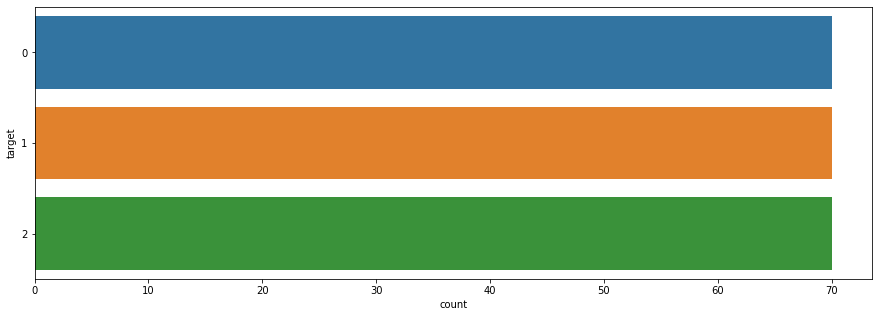

In [9]:
#Data Visualization - Label - countplot
fig,ax =  plt.subplots(figsize = (15 , 5))
sns.countplot(y = 'target' , data = df)
plt.show()

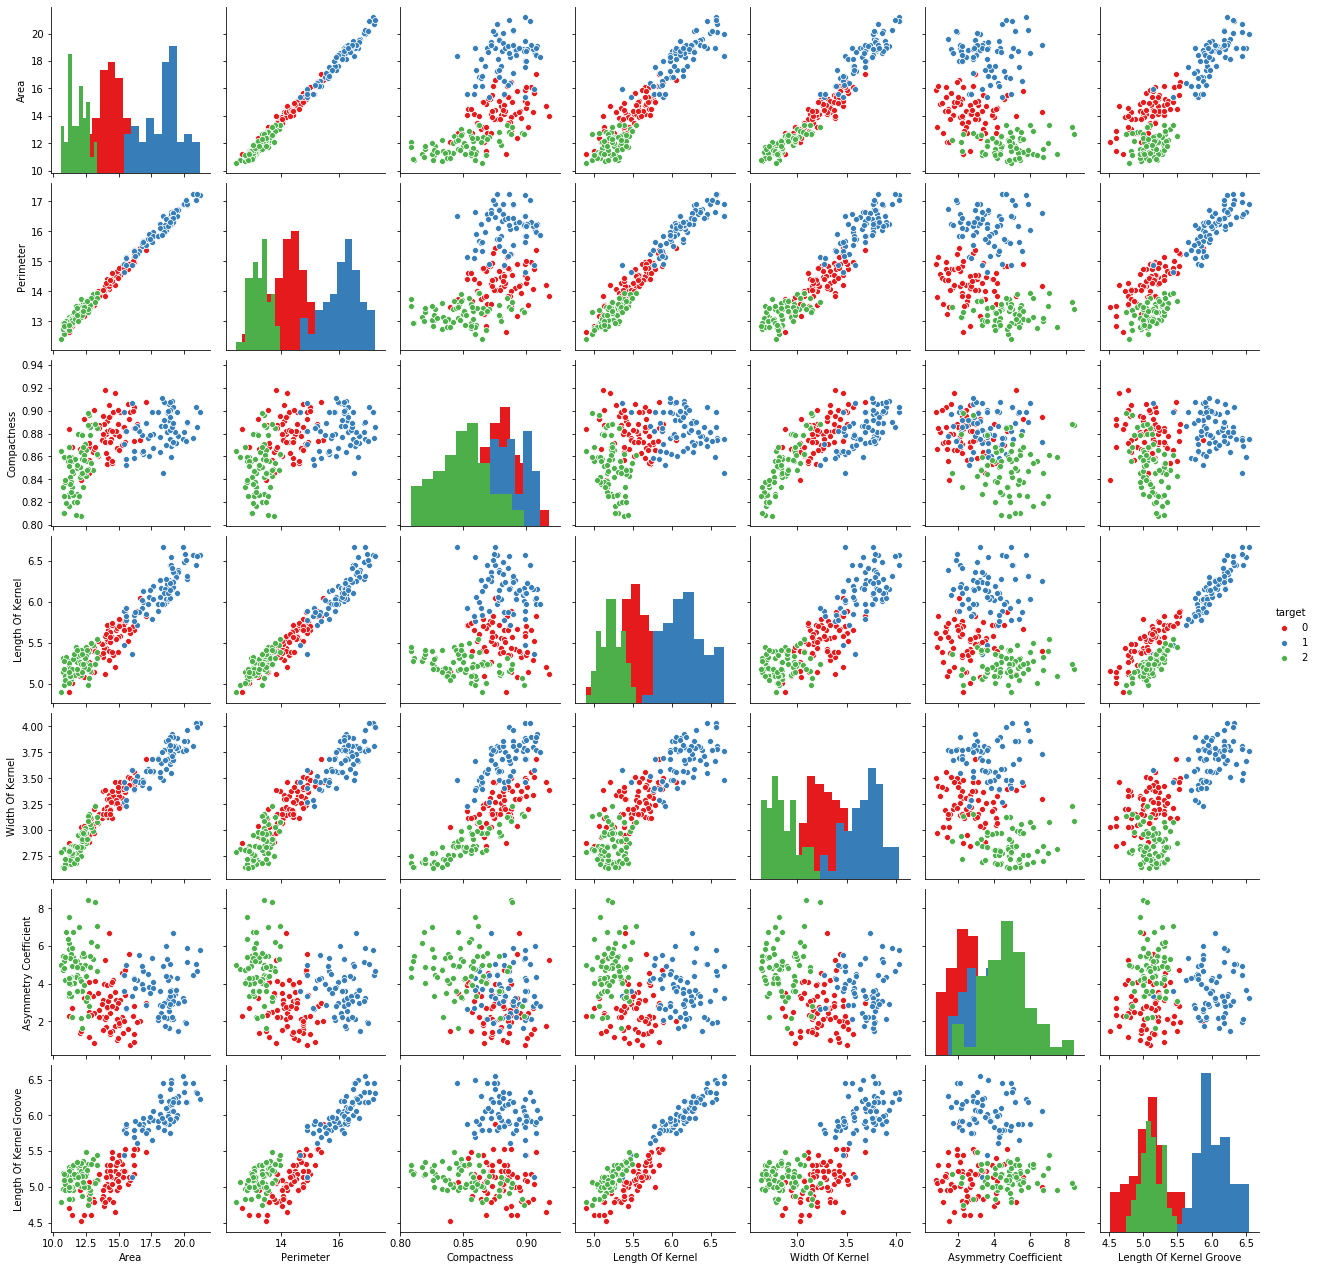

In [10]:
#Data Visualization - Continuous Variables - pairplot
sns.pairplot(data=df,
             hue="target", 
             diag_kind="hist",
             palette='Set1'
            )

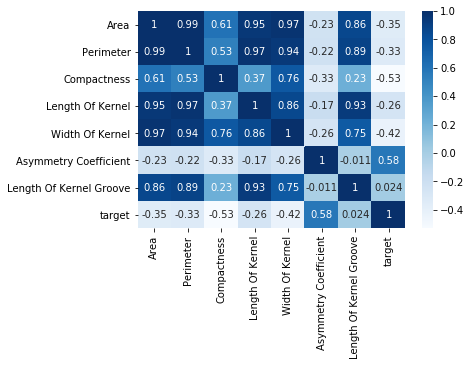

In [11]:
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True, cmap="Blues")

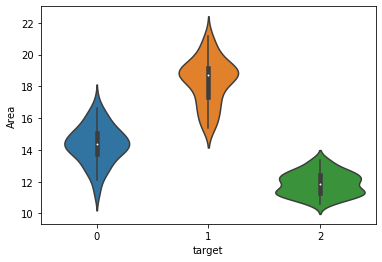

In [12]:
sns.violinplot(y='Area',x='target',data=df)
plt.show()

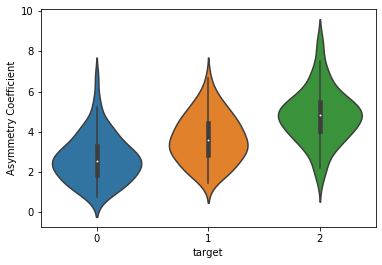

In [13]:
sns.violinplot(y='Asymmetry Coefficient',x='target',data=df)
plt.show()

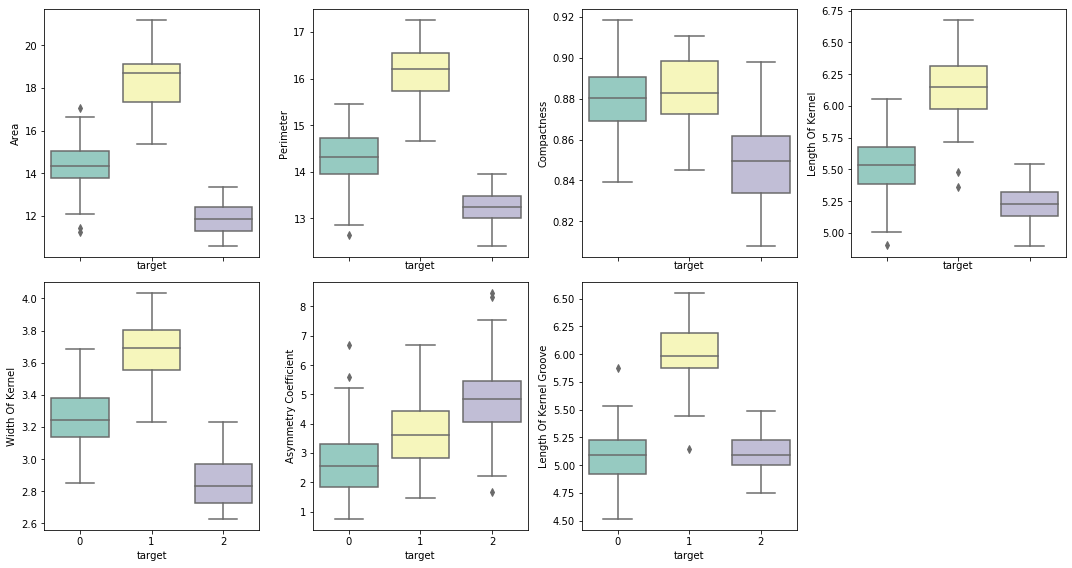

In [14]:
#Data Visualozation - Label vs other continuous variables - box plot
fig, axs = plt.subplots(ncols = 4, nrows = 2, figsize=(15,8),sharex=True)
for axi,col_name in zip(axs.flat,list(df.columns)):
    sns.boxplot(x="target",
                y=col_name,
                data=df,
                ax=axi,
               palette="Set3")
fig.delaxes(ax = axs[1,3])
fig.tight_layout()
fig.show()

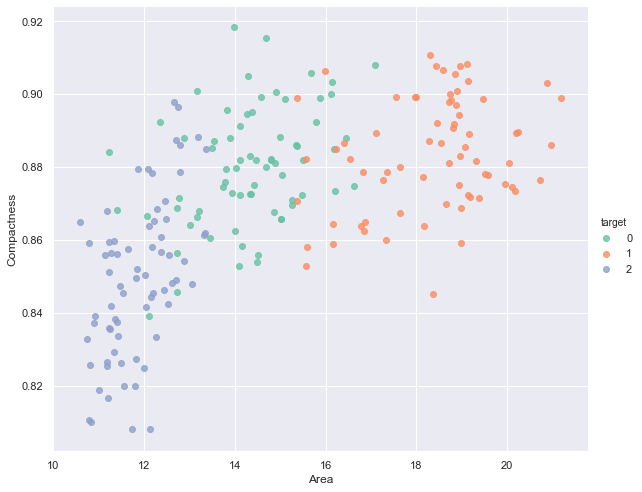

In [15]:
sns.set(style="darkgrid")
sns.lmplot('Area','Compactness',data=df, hue='target',
           palette='Set2',size=7,aspect=1.2,fit_reg=False);

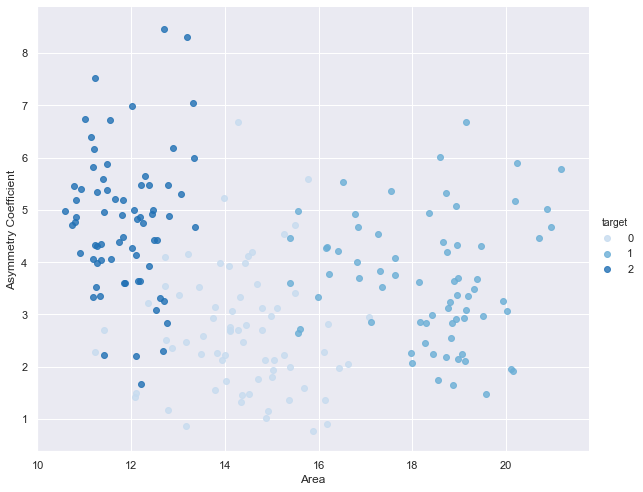

In [16]:
sns.lmplot('Area','Asymmetry Coefficient',data=df, hue='target',
           palette='Blues',size=7,aspect=1.2,fit_reg=False);

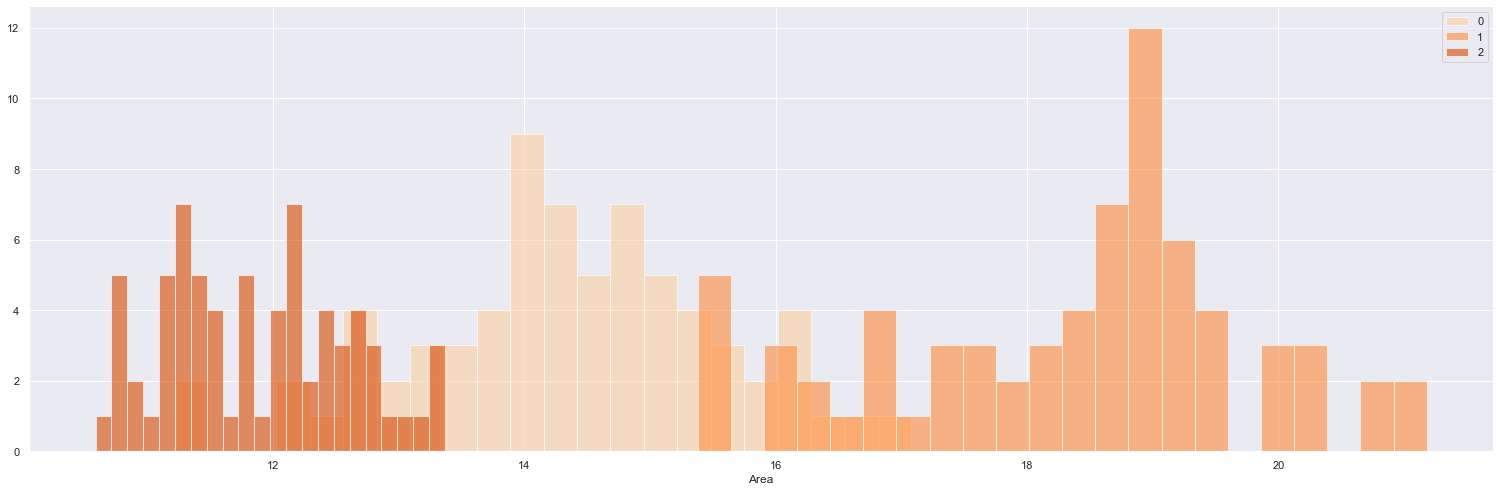

In [17]:
g = sns.FacetGrid(data = df, hue='target', palette='Oranges', size=7, aspect=3)
g = g.map(plt.hist,'Area',bins=22,alpha=0.6)
plt.legend();

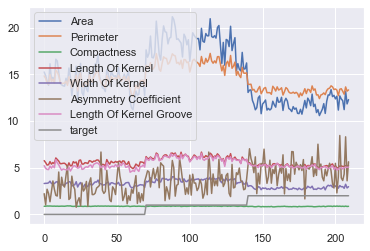

In [18]:
%matplotlib inline
df.plot();

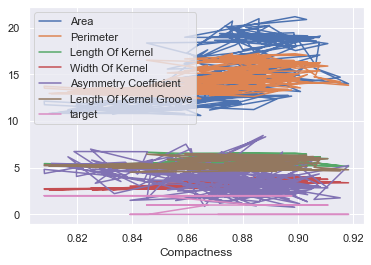

In [19]:
df = pd.read_csv('Seed.csv', index_col='Compactness')
df.head()
%matplotlib inline
df.plot();

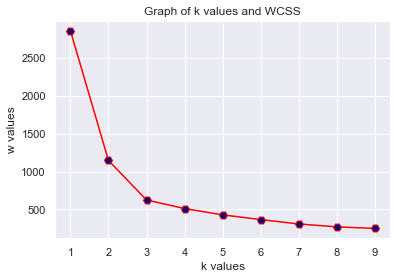

In [20]:
from sklearn.cluster import KMeans

w = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    w.append(kmeans.inertia_)
    
# Visualization of k values:

plt.plot(range(1,10), w, 
          linestyle ='-', marker = 'H',
         markersize = 8,markerfacecolor = 'navy',color='red')
plt.title('Graph of k values and WCSS')
plt.xlabel('k values')
plt.ylabel('w values')
plt.show()

We already know that our data set has three classes.

Bu if we didn't know how many classes we have in our data set, we sould use this method.

And according to the graph; it's elbow (where it bends) is the best k value for our K Means algorithm.

#### K-Means Clustering Algorithm:

In [21]:
# Now we know our best k value is 3, I am creating a new kmeans model:
kmeans2 = KMeans(n_clusters=3)

# Training the model:
clusters = kmeans2.fit_predict(df)

# Adding a label feature with the predicted class values:
df_k = df.copy(deep=True)
df_k['label'] = clusters

#### Comparing Original Classes and K-Means Algorithm Classes:

For visualization I will use only two features (A and P) for the original and predicted datasets. Different classes will have seperate color and styles.

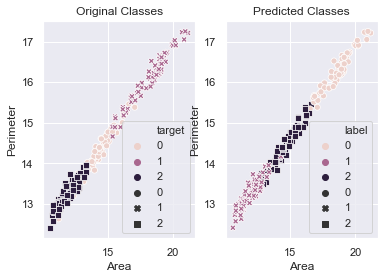

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1 = plt.subplot(1,2,1)
plt.title('Original Classes')
sns.scatterplot(x='Area', y='Perimeter', hue='target', style='target', data=df, ax=ax1)

ax2 = plt.subplot(1,2,2)
plt.title('Predicted Classes')
sns.scatterplot(x='Area', y='Perimeter', hue='label', style='label', data=df_k, ax=ax2)
plt.show()

In [23]:
print('Original Data Classes:')
print(df.target.value_counts())
print('-' * 30)
print('Predicted Data Classes:')
print(df_k.label.value_counts())

Original Data Classes:
2    70
1    70
0    70
Name: target, dtype: int64
------------------------------
Predicted Data Classes:
1    75
2    74
0    61
Name: label, dtype: int64


#### HIERARCHICAL CLUSTERING ALGORITHM:

##### Creating the Dendrogram:

We use dendrogram to find how many classes we have in our data set.

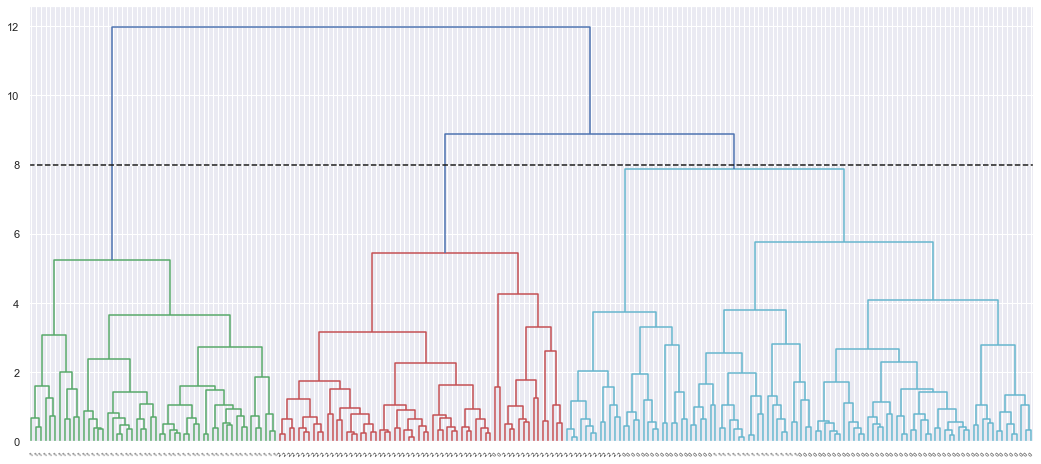

In [24]:
from scipy.cluster.hierarchy import linkage, dendrogram

#Agglomerative Clustering - Fathest point distance - Dendrogram

fig, ax = plt.subplots(figsize=(18,8))
mergings = linkage(df,method="complete")
dendrogram(mergings,
           labels=list(df["target"]),
           leaf_rotation=45,
           leaf_font_size=6,
)
ax.plot(ax.get_xbound(), [8,8],'--', c='k')
fig.show()

From the dendrogram we can read there are 3 classes in our data set.



In [25]:
#KMeans Clustering - Validation
model = KMeans(n_clusters = 3)
model.fit(df[list(df.columns[:-1])])
label_pred = model.predict(df[list(df.columns[:-1])])
wheat_preds = pd.DataFrame({"label_act":list(df["target"]),"label_kmeans":list(label_pred)})
pd.crosstab(wheat_preds.label_act,wheat_preds.label_kmeans)

label_kmeans,0,1,2
label_act,,,
0,60,9,1
1,10,0,60
2,2,68,0


We are able to segregate 188 out of 210 correctly. To improve this we can standardize data so that mean is 0 and variance is 1

In [26]:
df1 = df.sample(frac = 1, random_state= 3)
df1.head()

,Area,Perimeter,Length Of Kernel,Width Of Kernel,Asymmetry Coefficient,Length Of Kernel Groove,target
Compactness,,,,,,,
0.8558,11.14,12.79,5.011,2.794,6.388,5.049,2
0.8969,18.88,16.26,6.084,3.764,1.649,6.109,1
0.8588,16.17,15.38,5.762,3.387,4.286,5.703,1
0.8291,11.35,13.12,5.176,2.668,4.337,5.132,2
0.8735,20.16,17.03,6.513,3.773,1.910,6.185,1


In [27]:
X= df1.drop('target', axis = 1)
y= df1['target']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X,y, test_size= 0.3, random_state=3)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.metrics import classification_report
import scipy

import warnings
warnings.filterwarnings("ignore")

In [30]:
print('Training data size : ', X_train.shape)
print('Test data size : ', X_test.shape)

Training data size :  (147, 6)
Test data size :  (63, 6)


In [31]:
print('Training model with {} dimensions.'.format(X_train.shape[1]))
print('\nTesting model with {} dimensions.'.format(X_test.shape[1]))

Training model with 6 dimensions.

Testing model with 6 dimensions.


In [32]:
Training_to_original_ratio = round(X_train.shape[0]/(df1.shape[0]), 2) * 100

Testing_to_original_ratio = round(X_test.shape[0]/(df1.shape[0]), 2) * 100

print ('As shown below {}% of the data is for training and the rest {}% is for testing.'.format(Training_to_original_ratio, 
                                                                                               Testing_to_original_ratio))
list(zip(["Training set", "Testing set"],
   [Training_to_original_ratio, Testing_to_original_ratio]))

As shown below 70.0% of the data is for training and the rest 30.0% is for testing.


[('Training set', 70.0), ('Testing set', 30.0)]

In [33]:
lnr = LinearRegression()
lnr.fit(df.drop('target', axis = 1), df.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
print('Weight values: ', lnr.coef_, '\n\nIntercept: ', lnr.intercept_)

Weight values:  [ 0.70139551 -1.19362587 -2.25602137 -2.24280514  0.15003002  2.47276046] 

Intercept:  14.042854278062983


In [35]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(max_leaf_nodes=20, random_state=0,max_depth=20)
clf_dt.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [36]:
y_pred = clf_dt.predict(X_test)
x_pred= clf_dt.predict(X_train)

In [37]:
test_clf_dt_accuracy = accuracy_score(Y_test, y_pred)
print("Testing Accuracy using Decision Tree Classifier:",test_clf_dt_accuracy)

Testing Accuracy using Decision Tree Classifier: 0.9206349206349206


In [38]:
# Checking the model's training accuracy
train_clf_dt_accuracy=accuracy_score(Y_train,x_pred)
print("Training Accuracy using K-Nearest Neighbor:", train_clf_dt_accuracy)

Training Accuracy using K-Nearest Neighbor: 1.0


In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
confusion_matrix(Y_test,y_pred)
pd.crosstab(Y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,2,All
Actual,,,,
0,20,2,1,23
1,1,19,0,20
2,1,0,19,20
All,22,21,20,63


In [41]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89        23
           1       0.90      0.95      0.93        20
           2       0.95      0.95      0.95        20

    accuracy                           0.92        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.92      0.92      0.92        63

